# Model Developement

Now that we have pre-processed the training and test data, we can finally start fitting models to predict credit card defaulters.

In [1]:
#Loading necesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the training and test data
X_train = pd.read_csv('D:\Team Project\data\preprocessing\X_train.csv')
X_test = pd.read_csv('D:\Team Project\data\preprocessing\X_test.csv')
y_train = pd.read_csv('D:\Team Project\data\preprocessing\y_train.csv')
y_test = pd.read_csv('D:\Team Project\data\preprocessing\y_test.csv')

# Binary Classification Model
For the problem of binary classification, the first model that comes to mind is the simple logistic regression model.

## 1. Logistic Regression

Inititally, let's fit a logistic regression model to the training data blindly and see how it performs.

In [3]:
# Loading logistic regression model object from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

In [4]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Measuring the Performance Metrics of the Model

In [5]:
#Performance metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate and print performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[4821  278]
 [ 683  733]]
Accuracy: 85.25%
Precision: 72.50%
Recall: 51.77%
F1 Score: 60.40%



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5099
           1       0.86      0.65      0.74      1416

    accuracy                           0.90      6515
   macro avg       0.89      0.81      0.84      6515
weighted avg       0.90      0.90      0.90      6515

ROC-AUC Score: 0.87


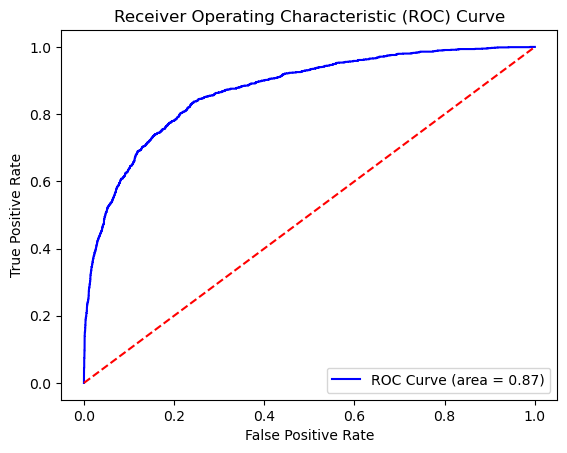

In [54]:
# Optional: Print the full classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

 #### Conclusions
+ The model has an accuracy score of 85.25% meaning it makes correct predictions almost 85% of the times.
+ The precision score is 72.50% which implies that when the model predicts defaulters, it is correct 73% of the times
+ As we see the model has a recall score of 51.77% which means it does not perform very well in capturing all the defaulters.

##### But can its performance be improved? Let's first check whether the assumptions of logistic regression are satisfied by the data.

#### Assumptions of Logistic Regression
+ First, binary logistic regression requires the dependent variable to be binary. (satisfied)
+ Second, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.
+ Third, logistic regression assumes linearity of independent variables and log odds of the dependent variable.

#### Let's check for multicollinearity in our dataset

<Axes: >

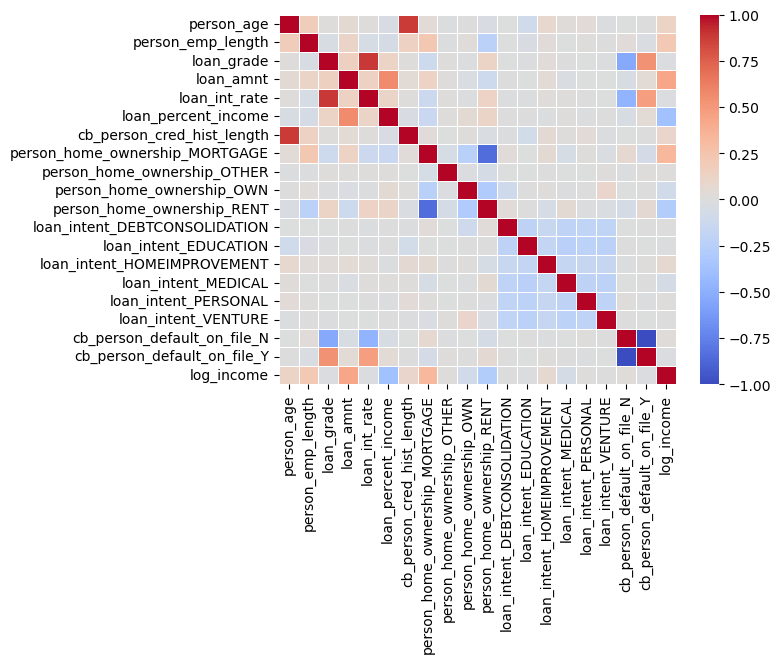

In [6]:
sns.heatmap(X_train.corr(), cmap='coolwarm',linewidths=0.5)

From the heatmap, some of the pairs of highly correlated features are:
+ Age and Credit History Length
+ Loan amount & loan percent income
+ Loan Grade and Loan Interest Rate
+ Loan interest rate and past default history
+ Loan grade and past default history

So based on these findings, we drop the following features
+ Age
+ Loan amount
+ Loan interest rate
+ Past default history

In [7]:
X_train_new = X_train.drop(['person_age','loan_amnt','loan_int_rate','cb_person_default_on_file_Y','cb_person_default_on_file_N'],axis=1)
X_test_new = X_test.drop(['person_age','loan_amnt','loan_int_rate','cb_person_default_on_file_Y','cb_person_default_on_file_N'],axis=1)

<Axes: >

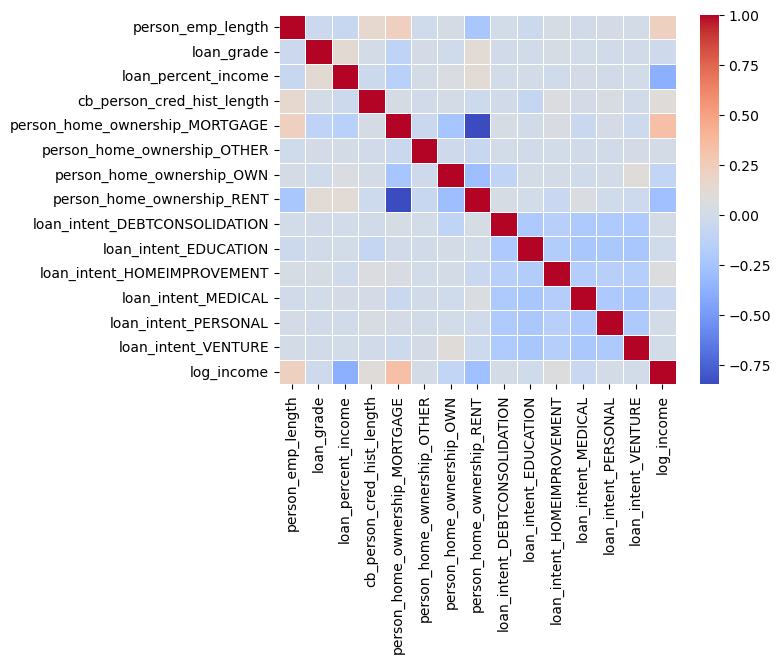

In [8]:
sns.heatmap(X_train_new.corr(), cmap='coolwarm',linewidths=0.5)

In [9]:
# Fit the model to the new training data
log_reg.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_new)
y_pred_prob = log_reg.predict_proba(X_test_new)[:, 1]

In [10]:
# Calculate and print performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[4831  268]
 [ 677  739]]
Accuracy: 85.50%
Precision: 73.39%
Recall: 52.19%
F1 Score: 61.00%


ROC-AUC Score: 0.87


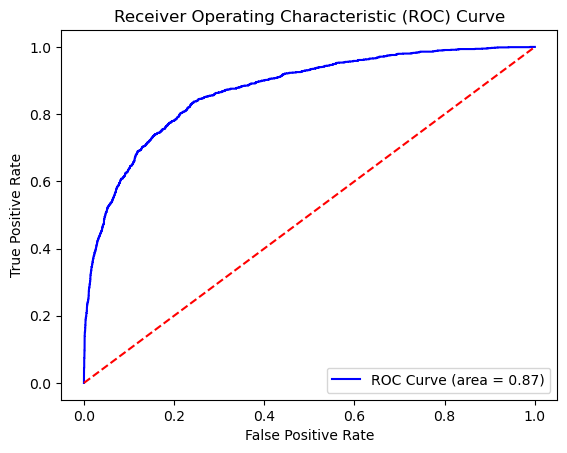

In [11]:
# Plotting ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


After removing multicollinearity from the data there is slight improvement in the recall and F1 score

####  Method 2: Using L1 (Lasso) regularization
Using L1 regularization we can counter overfitting as well as perform feature selection. The L1 regularization will perform feature selection for us and as a result remove multicollinearity from the data

In [12]:
# Initialize and fit the Lasso (L1) logistic regression model
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
log_reg_lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_lasso.predict(X_test)
y_pred_prob = log_reg_lasso.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 85.17%
Precision: 72.15%
Recall: 51.77%
F1 Score: 60.28%


ROC-AUC Score: 0.87


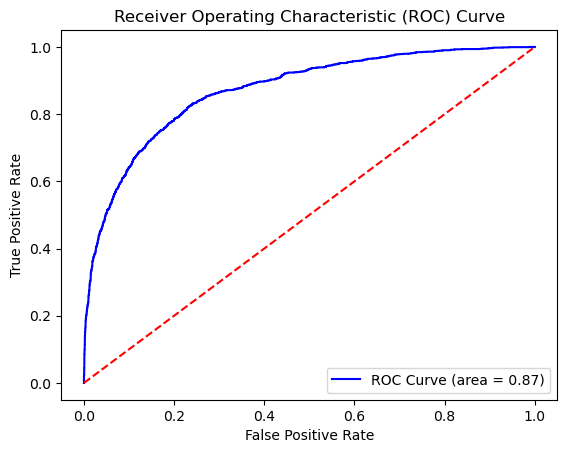

In [13]:
# Plotting ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [36]:
#Checking for overfitting
y_train_pred = log_reg_lasso.predict(X_train)
y_test_pred = log_reg_lasso.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.86
Test Accuracy: 0.85


While there is no overfitting of the model, it seems that that even with L1 regularization, the performance of Logistic Regression model could not be improved further. Next we will try K-Nearest Neighbour or KNN classification algorithm.

## 2. K-Nearest Neighbour Algorithm (or KNN algorithm)

At first we will try to see the performance of the KNN model with k=1

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)  # As a starting point we take k=1
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 86.52%
Precision: 69.38%
Recall: 68.01%
F1 Score: 68.69%


+ Compared to the logistic regression model the KNN classifier with k=1 has a higher recall and F1 score. This means KNN is better at capturing all the defaulters than Logistic Regression.
+ Now to make sure KNN performs optimally, we have to tune the value of the hyperparameter k. As of now, k=1 is a very small value of k which may lead to overfitting problem.

### Choosing a K value
Let's go ahead and use the elbow method to pick a good k value.

In [15]:
error_rate = []

# Loop over a range of k values
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != np.array(y_test)))

Text(0, 0.5, 'Error Rate')

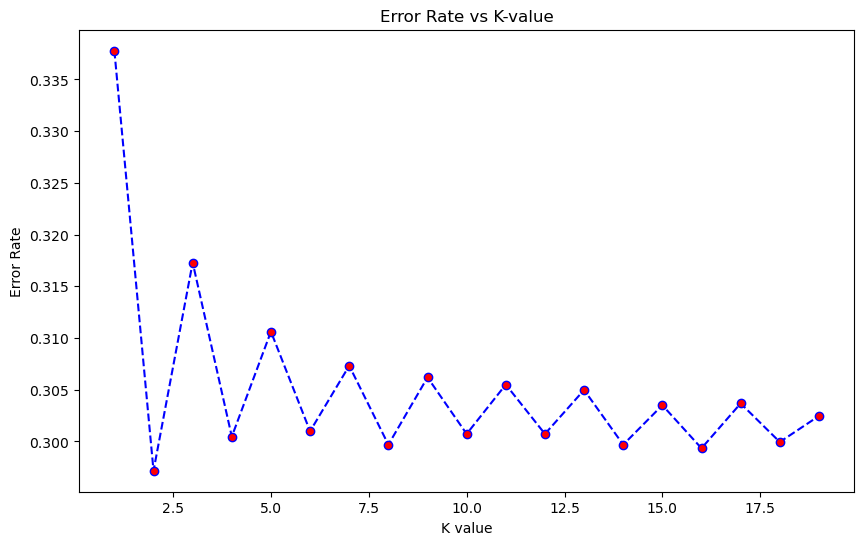

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='b',linestyle='dashed',marker='o',markerfacecolor='red')
plt.title("Error Rate vs K-value")
plt.xlabel("K value")
plt.ylabel("Error Rate")

Here we see that at k=2 the error rate is minimum and afterwards it just keeps oscillating between 30 to 31%

In [17]:
#A quick comparison with the previous k=1
print("With k=1")
print("\n")
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

With k=1


Confusion Matrix:
 [[4674  425]
 [ 453  963]]
Accuracy: 86.52%
Precision: 69.38%
Recall: 68.01%
F1 Score: 68.69%


In [18]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("With k=2")
print("\n")
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

With k=2


Confusion Matrix:
 [[5004   95]
 [ 591  825]]
Accuracy: 89.47%
Precision: 89.67%
Recall: 58.26%
F1 Score: 70.63%


It looks like that with k=2 there has been improvement in overall accuracy of the model but the recall rate has actually gone down. This means that with k=2 the model actually performs worse when it comes to capturing all of the true defaulters.
+ One of the possible reasons for this could be the fact that KNN algorithm suffers from the **Curse of Dimensionality**.
+ So maybe if we reduce the dimension of our training datset then the model will perform much better in this regard.

### Implementing PCA for dimensionality reduction
Using PCA on the training data, we can reduce the dimension of our dataset and then apply KNN to the reduced dataset.

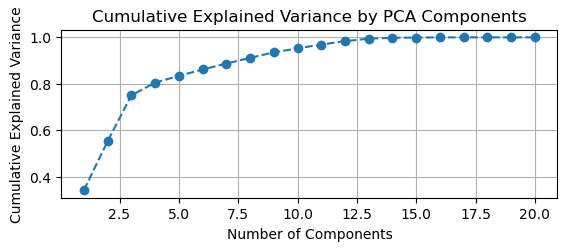

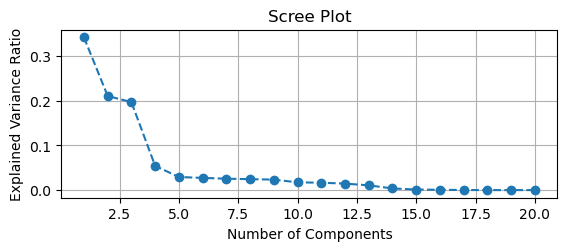

Number of components that explain at least 95.0% variance: 10


In [19]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.subplot(2,1,1)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

# Scree Plot
plt.subplot(2,1,2)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

# Determine the number of components that explain at least 95% of the variance
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components that explain at least {threshold * 100}% variance: {num_components}")


In [20]:
# Apply PCA
pca = PCA(n_components=10)  # Using 10 components which explain at least 95% of the total variance.
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Choosing optimal value of K using Grid Search Cross Validation

In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# Use GridSearchCV to find the best value of k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

# Get the best parameter and the corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best cross-validation accuracy: {best_score}")

Best k: 11
Best cross-validation accuracy: 0.8985380562665346


### Fitting KNN on dimension reduced data 

In [22]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)

print("With k=11 after applying PCA")
print("\n")
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

With k=11 after applying PCA


Confusion Matrix:
 [[4951  148]
 [ 496  920]]
Accuracy: 90.12%
Precision: 86.14%
Recall: 64.97%
F1 Score: 74.07%


ROC-AUC Score: 0.89


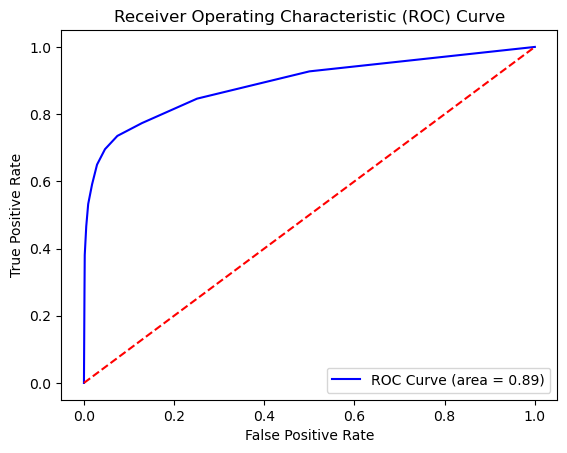

In [23]:
# Get predicted probabilities
y_pred_prob = knn.predict_proba(X_test_pca)[:, 1]
# Plotting ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [34]:
#Checking for overfitting
y_train_pred = knn.predict(X_train_pca)
y_test_pred = knn.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.91
Test Accuracy: 0.90


The model is not overfitting meaning it generalizes well to unseen data.

### Finally with KNN, we have attained an overall accuracy of 90% which is an improvement over Logistic Regrression
However, the recall rate of the model is still not satisfactory enough. Next we will try implementing Decision Trees and Random Forest

## 3. Decision Tree

Initially let's just start by fitting a decision tree blindly and see how it performs.

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

In [30]:
# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[4717  382]
 [ 303 1113]]
Accuracy: 89.49%
Precision: 74.45%
Recall: 78.60%
F1 Score: 76.47%


ROC-AUC Score: 0.86


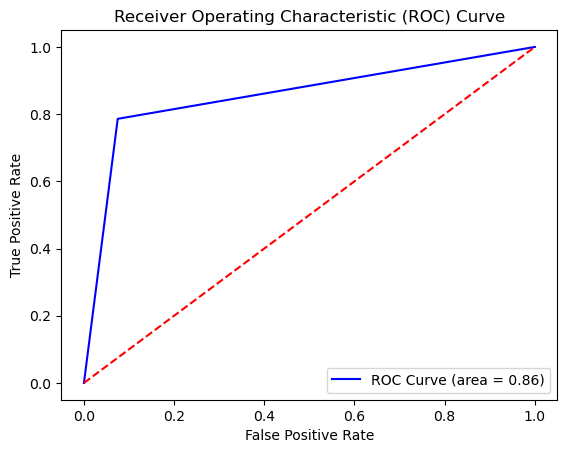

In [31]:
# Get predicted probabilities
y_pred_prob = dt.predict_proba(X_test)[:, 1]
# Plotting ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Here we see that, while decision tree has an overall better accuracy, precision, recall and f1 score compared to previous algorithms, the AUC-ROC score is actually lowest till now. So we may be facing a case of overfitting.

In [32]:
#Checking for overfitting
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.89


Training accuracy of 1.00 meaning a perfect fit!! This means the model is definitely overfitting.

### Pruning
Pruning is applied on decision trees to prevent overfitting. Wee will try pruning our decision tree to remove overfitting.

There are two main approaaches for pruning a decision tree
+ Pre-pruning (Early Stopping)
+ Post-pruning (Cost Complexity Pruning)

##### Pre-pruning (Early Stopping)

In [45]:
# Define and train a decision tree with pre-pruning constraints
dt_pre = DecisionTreeClassifier(
    max_depth=5,              # Limit the maximum depth of the tree
    min_samples_split=10,     # Minimum number of samples required to split an internal node
    min_samples_leaf=5,       # Minimum number of samples required to be at a leaf node
    max_leaf_nodes=20,        # Maximum number of leaf nodes
    random_state=42
)
dt_pre.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_pre.predict(X_test)

In [46]:
# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[5066   33]
 [ 445  971]]
Accuracy: 92.66%
Precision: 96.71%
Recall: 68.57%
F1 Score: 80.25%


In [48]:
#Checking for overfitting
y_train_pred = dt_pre.predict(X_train)
y_test_pred = dt_pre.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.92
Test Accuracy: 0.93


Overfitting is resolved! Let's see the AUC-ROC score

ROC-AUC Score: 0.90


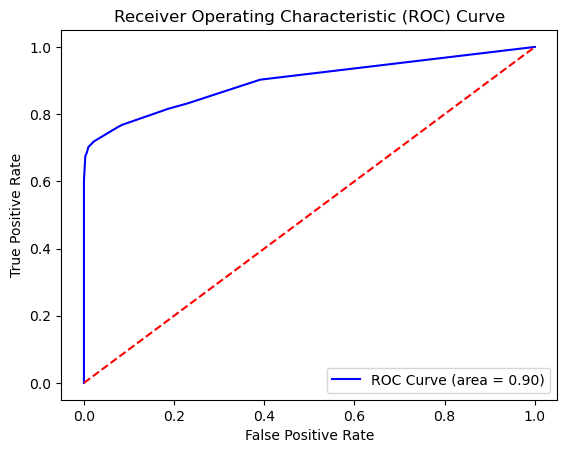

In [49]:
# Get predicted probabilities
y_pred_prob = dt_pre.predict_proba(X_test)[:, 1]
# Plotting ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

As expected, auc-roc score has been improved.

##### Post-pruning (Cost Complexity Pruning)

In [60]:
from sklearn.tree import plot_tree

# Cost-complexity pruning (Post-pruning)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of decision trees with different alpha values
pruned_models = []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha)
    pruned_model.fit(X_train, y_train)
    pruned_models.append(pruned_model)

# Find the model with the best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model

# Predict on the test set
y_pred = best_pruned_model.predict(X_test)

In [61]:
# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[5074   25]
 [ 392 1024]]
Accuracy: 93.60%
Precision: 97.62%
Recall: 72.32%
F1 Score: 83.08%


In [62]:
#Checking for overfitting
y_train_pred = best_pruned_model.predict(X_train)
y_test_pred = best_pruned_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.94
Test Accuracy: 0.94


No overfitting! In fact train and test accuracy are exactly same.

ROC-AUC Score: 0.92


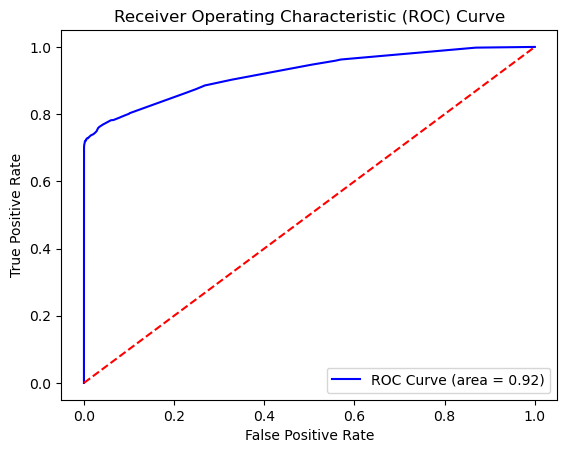

In [63]:
# Get predicted probabilities
y_pred_prob = best_pruned_model.predict_proba(X_test)[:, 1]
# Plotting ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Post-Pruning is more effective at removing overfitting and gives a better performing model with higher accuracy rate, F1 score and AUC-ROC score.

+ By now we have applied Logistic Regression, KNN and Decision Trees for predicting defaulters and Decision tree is giving the best performance among all three algorithms.
+ Post-pruned decision tree has an accuracy of 93%, precision of 97% and recall rate 72%. It seems that compared to precision the recall rate could be improved further.
+ Next we will try to implement Random Forest which combines multiple decision trees using ensembling methods like bagging and see if it further improves upon the performance of the decision tree algorithm.

## 4. Random Forest

As ususal, at first let's just fit a simple random forest classifier to the training data and then see if we can further improve upon it.

In [67]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

In [68]:
# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[5069   30]
 [ 382 1034]]
Accuracy: 93.68%
Precision: 97.18%
Recall: 73.02%
F1 Score: 83.39%


In [69]:
#Checking for overfitting
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.94


Just like with decision trees, Random Forest classifier is also overfitting on the training data.

There are several ways to address overfitting with Random Forest like increasing the number of trees, limiting the depth of the trees, feature subsampling, Out of Bag Error (or OOB error) etc.

In [71]:
# Define the model with various parameters to prevent overfitting
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=10,             # Maximum depth of trees
    max_features='sqrt',      # Number of features to consider at each split
    oob_score=True,           # Use out-of-bag samples to estimate the generalization error
    random_state=42
)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

In [72]:
# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Confusion Matrix:
 [[5079   20]
 [ 405 1011]]
Accuracy: 93.48%
Precision: 98.06%
Recall: 71.40%
F1 Score: 82.63%


In [73]:
#Checking for overfitting
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.94
Test Accuracy: 0.93


No more overfitting

ROC-AUC Score: 0.93


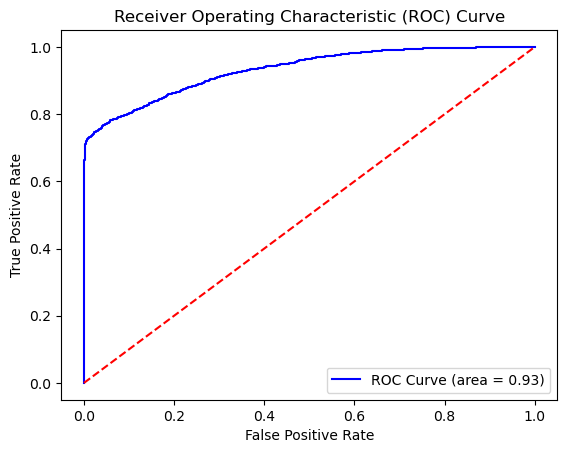

In [74]:
# Get predicted probabilities
y_pred_prob = rf.predict_proba(X_test)[:, 1]
# Plotting ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

It seems that random forest and decision tree both perform almost on the same level.

# Algorithm Evaluation

## Accuracy
+ **Logistic Regression:** 85.17%
+ **KNN :** 90.12%
+ **Decision Tree:** 93.60%
+ **Random Forest:** 93.48%

## Precision
+ **Logistic Regression:** 72.15%
+ **KNN :** 86.15%
+ **Decision Tree:** 97.62%
+ **Random Forest:** 98.06%

## Recall
+ **Logistic Regression:** 51.77%
+ **KNN :** 64.97%
+ **Decision Tree:** 72.32%
+ **Random Forest:** 71.40%

## F1 Score
+ **Logistic Regression:** 60.28%
+ **KNN :** 74.07%
+ **Decision Tree:** 83.08%
+ **Random Forest:** 82.63%